In [ ]:
#importing necessary packages
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
#reading in 86 row dataset 
whiskey_quant = pd.read_csv('https://raw.githubusercontent.com/schulzmf/IST718/main/projectwhisky_quant_clean.csv')

In [ ]:
#making file a dataframe
whiskey_quant = pd.DataFrame(whiskey_quant)

In [ ]:
#setting distillery as the index
whiskey_quant.set_index('Distillery')

,Unnamed: 0,DistCode,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Latitude,Longitude,%alc,review_point,price
Distillery,,,,,,,,,,,,,,,,,,,
Aberfeldy,0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,286580.0,749680.0,46.230769,86.692308,131.000000
Aberlour,1,1.0,3.0,3.0,1.0,0.0,0.0,4.0,3.0,2.0,2.0,3.0,3.0,2.0,326340.0,842570.0,49.333333,87.666667,80.600000
AnCnoc,2,2.0,1.0,3.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,3.0,2.0,352960.0,839320.0,45.000000,89.000000,178.800000
Ardbeg,3,3.0,4.0,1.0,4.0,4.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0,0.0,141560.0,646220.0,50.344828,89.833333,1464.200000
Ardmore,4,4.0,2.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,355350.0,829140.0,50.000000,86.571429,156.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tobermory,81,81.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,2.0,150450.0,755070.0,49.625000,85.625000,102.250000
Tomatin,82,82.0,2.0,3.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,0.0,1.0,279120.0,829630.0,47.363636,85.454545,320.909091
Tomintoul,83,83.0,0.0,3.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,315100.0,825560.0,43.692308,87.615385,222.923077


In [ ]:
#looking at head of data 
whiskey_quant.head()

,Unnamed: 0,Distillery,DistCode,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Latitude,Longitude,%alc,review_point,price
0,0,Aberfeldy,0.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,286580.0,749680.0,46.230769,86.692308,131.000000
1,1,Aberlour,1.0,3.0,3.0,1.0,0.0,0.0,4.0,3.0,2.0,2.0,3.0,3.0,2.0,326340.0,842570.0,49.333333,87.666667,80.600000
2,2,AnCnoc,2.0,1.0,3.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,3.0,2.0,352960.0,839320.0,45.000000,89.000000,178.800000
3,3,Ardbeg,3.0,4.0,1.0,4.0,4.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0,0.0,141560.0,646220.0,50.344828,89.833333,1464.200000
4,4,Ardmore,4.0,2.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,355350.0,829140.0,50.000000,86.571429,156.428571


In [ ]:
#making small dataframe for k-means clustering
whiskey = whiskey_quant[['Distillery','Body','Sweetness','Smoky','Medicinal','Tobacco','Honey','Spicy','Winey','Nutty','Malty','Fruity','Floral','%alc']]

In [ ]:
whiskey = whiskey.set_index('Distillery')


In [ ]:
whiskey.head()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,%alc
Distillery,,,,,,,,,,,,,
Aberfeldy,2.0,2.0,2.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,46.230769
Aberlour,3.0,3.0,1.0,0.0,0.0,4.0,3.0,2.0,2.0,3.0,3.0,2.0,49.333333
AnCnoc,1.0,3.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,3.0,2.0,45.000000
Ardbeg,4.0,1.0,4.0,4.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0,0.0,50.344828
Ardmore,2.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,50.000000


In [ ]:
#importing elbow visualizer to get best number of clusters
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()

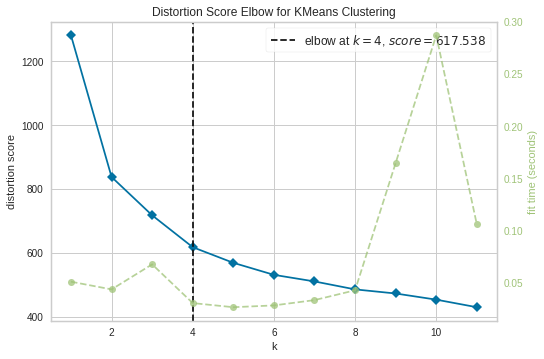

In [ ]:
#creating graph to find best number of clusters which is 4
visualizer = KElbowVisualizer(model, k=(1,12)).fit(whiskey)
visualizer.show()

In [ ]:
#creating kmeans clusters
kmeans = KMeans(n_clusters = 4,init = 'k-means++',random_state = 0).fit(whiskey)


In [ ]:
#printing out the predicted clusters for each distillery
y_predicted = kmeans.fit_predict(whiskey)
y_predicted

array([0, 2, 3, 1, 2, 2, 0, 2, 2, 3, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 1,
       0, 1, 2, 0, 2, 3, 0, 0, 3, 2, 3, 2, 0, 2, 2, 0, 3, 0, 0, 2, 0, 3,
       2, 3, 0, 2, 0, 0, 0, 3, 0, 2, 0, 3, 3, 1, 1, 2, 0, 0, 0, 2, 2, 2,
       0, 3, 0, 3, 3, 3, 3, 0, 2, 0, 2, 1, 0, 3, 2, 2, 0, 3, 2, 3],
      dtype=int32)

In [ ]:
#adding in clusters to the dataset
whiskey['cluster'] = y_predicted
whiskey.head()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,%alc,cluster
Distillery,,,,,,,,,,,,,,
Aberfeldy,2.0,2.0,2.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,46.230769,0
Aberlour,3.0,3.0,1.0,0.0,0.0,4.0,3.0,2.0,2.0,3.0,3.0,2.0,49.333333,2
AnCnoc,1.0,3.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,3.0,2.0,45.000000,3
Ardbeg,4.0,1.0,4.0,4.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0,0.0,50.344828,1
Ardmore,2.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,50.000000,2


In [ ]:
cluster_1 = whiskey[whiskey['cluster'] == 1]

In [23]:
print(cluster_1)

            Body  Sweetness  Smoky  ...  Floral       %alc  cluster
Distillery                          ...                            
Ardbeg       4.0        1.0    4.0  ...     0.0  50.344828        1
Caol Ila     3.0        1.0    4.0  ...     1.0  50.820000        1
Clynelish    3.0        2.0    3.0  ...     0.0  48.730769        1
Lagavulin    4.0        1.0    4.0  ...     0.0  52.285714        1
Laphroaig    4.0        2.0    4.0  ...     0.0  49.000000        1
Talisker     4.0        2.0    3.0  ...     0.0  48.230769        1

[6 rows x 14 columns]


In [ ]:
cluster_1.describe()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,%alc,cluster
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0
mean,3.666667,1.500000,3.666667,3.333333,0.666667,0.166667,1.666667,0.50000,1.166667,1.333333,1.166667,0.166667,49.902013,1.0
std,0.516398,0.547723,0.516398,0.816497,0.516398,0.408248,1.032796,0.83666,0.408248,0.516398,0.752773,0.408248,1.529661,0.0
min,3.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,48.230769,1.0
25%,3.250000,1.000000,3.250000,3.000000,0.250000,0.000000,1.250000,0.00000,1.000000,1.000000,1.000000,0.000000,48.798077,1.0
50%,4.000000,1.500000,4.000000,3.500000,1.000000,0.000000,2.000000,0.00000,1.000000,1.000000,1.000000,0.000000,49.672414,1.0
75%,4.000000,2.000000,4.000000,4.000000,1.000000,0.000000,2.000000,0.75000,1.000000,1.750000,1.750000,0.000000,50.701207,1.0
max,4.000000,2.000000,4.000000,4.000000,1.000000,1.000000,3.000000,2.00000,2.000000,2.000000,2.000000,1.000000,52.285714,1.0


In [24]:
print(cluster_0)

               Body  Sweetness  Smoky  ...  Floral       %alc  cluster
Distillery                             ...                            
Aberfeldy       2.0        2.0    2.0  ...     2.0  46.230769        0
Auchentoshan    0.0        2.0    0.0  ...     3.0  47.125000        0
Balvenie        3.0        2.0    1.0  ...     2.0  47.513514        0
Benriach        2.0        2.0    1.0  ...     2.0  48.475000        0
Benromach       2.0        2.0    2.0  ...     2.0  46.583333        0
Bunnahabhain    1.0        2.0    1.0  ...     3.0  48.486486        0
Cardhu          1.0        3.0    1.0  ...     2.0  46.000000        0
Craigellachie   2.0        2.0    2.0  ...     4.0  47.750000        0
Dalwhinnie      2.0        2.0    2.0  ...     2.0  46.500000        0
Deanston        2.0        2.0    1.0  ...     1.0  47.625000        0
GlenGarioch     2.0        1.0    3.0  ...     2.0  47.500000        0
GlenMoray       1.0        2.0    1.0  ...     4.0  46.105263        0
GlenSc

In [ ]:
cluster_0 = whiskey[whiskey['cluster'] == 0]

In [ ]:
cluster_0.describe()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,%alc,cluster
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,1.833333,2.133333,1.300000,0.333333,0.066667,1.400000,1.400000,1.033333,1.533333,2.066667,1.866667,2.000000,46.988915,0.0
std,0.874281,0.571346,0.651259,0.660895,0.253708,0.770132,0.723974,1.033352,0.776079,0.365148,0.776079,0.909718,0.837645,0.0
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,45.250000,0.0
25%,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,46.511905,0.0
50%,2.000000,2.000000,1.000000,0.000000,0.000000,1.500000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,46.961538,0.0
75%,2.000000,2.000000,2.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,47.597128,0.0
max,4.000000,3.000000,3.000000,2.000000,1.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,48.486486,0.0


In [26]:
cluster_2 = whiskey[whiskey['cluster'] == 2]

In [27]:
print(cluster_2)

               Body  Sweetness  Smoky  ...  Floral       %alc  cluster
Distillery                             ...                            
Aberlour        3.0        3.0    1.0  ...     2.0  49.333333        2
Ardmore         2.0        2.0    2.0  ...     1.0  50.000000        2
ArranIsleOf     2.0        3.0    1.0  ...     2.0  49.756757        2
Auchroisk       2.0        3.0    1.0  ...     1.0  53.285714        2
Aultmore        2.0        2.0    1.0  ...     2.0  51.333333        2
Balmenach       4.0        3.0    2.0  ...     2.0  50.500000        2
BenNevis        4.0        2.0    2.0  ...     2.0  48.818182        2
Benrinnes       3.0        2.0    2.0  ...     2.0  53.000000        2
Bladnoch        1.0        2.0    1.0  ...     3.0  49.363636        2
BlairAthol      2.0        2.0    2.0  ...     2.0  49.333333        2
Bowmore         2.0        2.0    3.0  ...     2.0  50.406780        2
Bruichladdich   1.0        1.0    2.0  ...     2.0  51.538462        2
Cragga

In [28]:
cluster_2.describe()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,%alc,cluster
count,31.000000,31.000000,31.000000,31.000000,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0
mean,2.096774,2.387097,1.451613,0.290323,0.0,1.354839,1.322581,1.064516,1.612903,1.612903,1.774194,1.774194,50.336320,2.0
std,0.830857,0.760588,0.675214,0.588419,0.0,0.877435,0.832150,0.928636,0.919327,0.803219,0.716923,0.616964,1.217765,0.0
min,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.709677,2.0
25%,2.000000,2.000000,1.000000,0.000000,0.0,1.000000,1.000000,0.000000,1.000000,1.000000,1.500000,1.500000,49.348485,2.0
50%,2.000000,2.000000,1.000000,0.000000,0.0,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,50.000000,2.0
75%,2.000000,3.000000,2.000000,0.000000,0.0,2.000000,2.000000,1.500000,2.000000,2.000000,2.000000,2.000000,51.166667,2.0
max,4.000000,4.000000,3.000000,2.000000,0.0,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,53.285714,2.0


In [29]:
cluster_3 = whiskey[whiskey['cluster'] == 3]

In [30]:
print(cluster_3)

                    Body  Sweetness  Smoky  ...  Floral       %alc  cluster
Distillery                                  ...                            
AnCnoc               1.0        3.0    2.0  ...     2.0  45.000000        3
Balblair             2.0        3.0    2.0  ...     1.0  44.954545        3
Dalmore              3.0        2.0    2.0  ...     1.0  45.046512        3
Dufftown             2.0        3.0    1.0  ...     2.0  43.750000        3
GlenDeveronMacduff   2.0        3.0    1.0  ...     1.0  44.428571        3
GlenOrd              3.0        2.0    1.0  ...     2.0  44.142857        3
Glendullan           3.0        2.0    1.0  ...     2.0  44.500000        3
Glenfiddich          1.0        3.0    1.0  ...     2.0  43.315789        3
Glenrothes           2.0        3.0    1.0  ...     0.0  45.234043        3
Isle of Jura         2.0        1.0    2.0  ...     1.0  44.250000        3
Knockando            2.0        3.0    1.0  ...     2.0  43.000000        3
OldFettercai

In [ ]:
cluster_3.describe()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,%alc,cluster
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.0
mean,1.894737,2.631579,1.368421,0.421053,0.210526,1.157895,1.368421,0.894737,1.210526,1.842105,1.947368,1.578947,44.003401,3.0
std,0.809303,0.683986,0.597265,0.606977,0.418854,0.834210,0.760886,0.809303,0.787327,0.501460,0.848115,0.692483,1.050721,0.0
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,42.000000,3.0
25%,1.500000,2.000000,1.000000,0.000000,0.000000,0.500000,1.000000,0.000000,1.000000,2.000000,1.500000,1.000000,43.157895,3.0
50%,2.000000,3.000000,1.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,44.142857,3.0
75%,2.000000,3.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.500000,2.000000,2.000000,2.500000,2.000000,44.977273,3.0
max,3.000000,4.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,45.666667,3.0


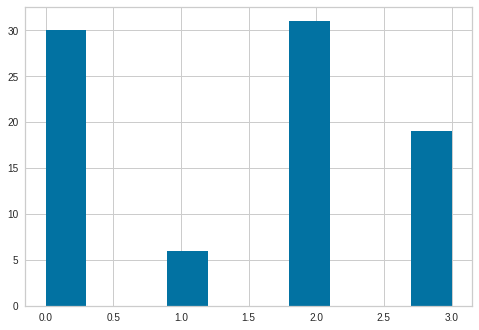

In [ ]:
whiskey['cluster'].hist()

In [ ]:
#displaing cluster labels
kmeans.labels_

array([0, 2, 3, 1, 2, 2, 0, 2, 2, 3, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 1,
       0, 1, 2, 0, 2, 3, 0, 0, 3, 2, 3, 2, 0, 2, 2, 0, 3, 0, 0, 2, 0, 3,
       2, 3, 0, 2, 0, 0, 0, 3, 0, 2, 0, 3, 3, 1, 1, 2, 0, 0, 0, 2, 2, 2,
       0, 3, 0, 3, 3, 3, 3, 0, 2, 0, 2, 1, 0, 3, 2, 2, 0, 3, 2, 3],
      dtype=int32)

In [ ]:
#inertia for kmeans
kmeans.inertia_

617.2150050106516

In [ ]:
#number of iterations 
kmeans.n_iter_

5

In [ ]:
kmeans.cluster_centers_

array([[ 1.83333333e+00,  2.13333333e+00,  1.30000000e+00,
         3.33333333e-01,  6.66666667e-02,  1.40000000e+00,
         1.40000000e+00,  1.03333333e+00,  1.53333333e+00,
         2.06666667e+00,  1.86666667e+00,  2.00000000e+00,
         4.69889149e+01],
       [ 3.66666667e+00,  1.50000000e+00,  3.66666667e+00,
         3.33333333e+00,  6.66666667e-01,  1.66666667e-01,
         1.66666667e+00,  5.00000000e-01,  1.16666667e+00,
         1.33333333e+00,  1.16666667e+00,  1.66666667e-01,
         4.99020134e+01],
       [ 2.09677419e+00,  2.38709677e+00,  1.45161290e+00,
         2.90322581e-01, -9.71445147e-17,  1.35483871e+00,
         1.32258065e+00,  1.06451613e+00,  1.61290323e+00,
         1.61290323e+00,  1.77419355e+00,  1.77419355e+00,
         5.03363201e+01],
       [ 1.89473684e+00,  2.63157895e+00,  1.36842105e+00,
         4.21052632e-01,  2.10526316e-01,  1.15789474e+00,
         1.36842105e+00,  8.94736842e-01,  1.21052632e+00,
         1.84210526e+00,  1.94736842e

In [ ]:
#looking at distribution of clusters
from collections import Counter
Counter(kmeans.labels_)

Counter({0: 30, 1: 6, 2: 31, 3: 19})

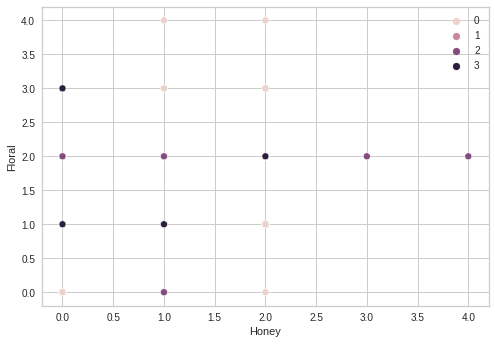

In [ ]:
#plotting clusters based on alc & review points
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data = whiskey, x = whiskey['Honey'], y =whiskey['Floral'], hue = kmeans.labels_)
plt.show()

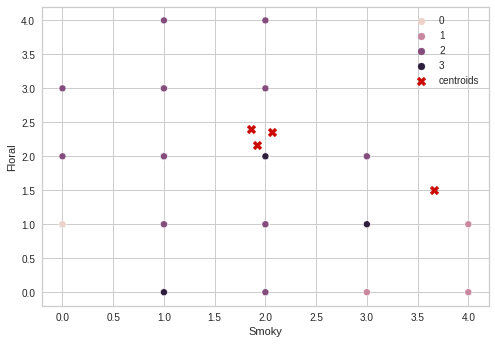

In [ ]:
#plotting clusters and centroids based on smoky & floral
sns.scatterplot(data = whiskey, x = whiskey['Smoky'], y =whiskey['Floral'], hue = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [ ]:
#creating kmeans clusters- with more clusters
kmeans2 = KMeans(n_clusters = 6,init = 'k-means++',random_state = 0).fit(whiskey)


In [ ]:
#printing out the predicted clusters for each distillery
y_predicted2 = kmeans2.fit_predict(whiskey)
y_predicted2

array([5, 4, 5, 2, 0, 0, 3, 0, 0, 5, 4, 4, 4, 4, 0, 3, 0, 4, 4, 0, 4, 2,
       3, 2, 4, 4, 0, 5, 3, 3, 1, 0, 5, 4, 4, 0, 0, 3, 1, 5, 3, 0, 4, 1,
       4, 5, 5, 0, 5, 1, 5, 5, 3, 4, 3, 1, 1, 2, 2, 0, 1, 3, 4, 0, 0, 4,
       5, 1, 5, 5, 1, 5, 5, 3, 4, 5, 0, 2, 4, 5, 0, 0, 3, 5, 0, 3],
      dtype=int32)

In [ ]:
#adding in clusters to the dataset
whiskey['cluster2'] = y_predicted2
whiskey.head()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,%alc,review_point,cluster,cluster2
Distillery,,,,,,,,,,,,,,,,
Aberfeldy,2.0,2.0,2.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,46.230769,86.692308,2,5
Aberlour,3.0,3.0,1.0,0.0,0.0,4.0,3.0,2.0,2.0,3.0,3.0,2.0,49.333333,87.666667,3,4
AnCnoc,1.0,3.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,3.0,2.0,45.000000,89.000000,2,5
Ardbeg,4.0,1.0,4.0,4.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0,0.0,50.344828,89.833333,1,2
Ardmore,2.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,50.000000,86.571429,3,0


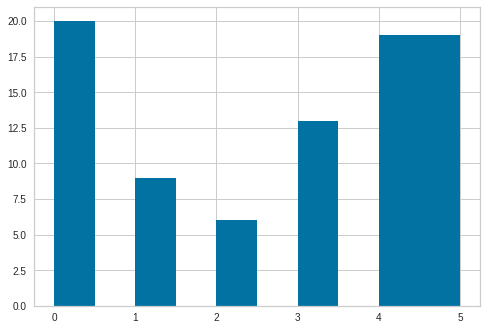

In [ ]:
whiskey['cluster2'].hist()

In [ ]:
display(whiskey)

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,%alc,review_point,cluster,cluster2
Distillery,,,,,,,,,,,,,,,,
Aberfeldy,2.0,2.0,2.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,46.230769,86.692308,2,5
Aberlour,3.0,3.0,1.0,0.0,0.0,4.0,3.0,2.0,2.0,3.0,3.0,2.0,49.333333,87.666667,3,4
AnCnoc,1.0,3.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,2.0,3.0,2.0,45.000000,89.000000,2,5
Ardbeg,4.0,1.0,4.0,4.0,0.0,0.0,2.0,0.0,1.0,2.0,1.0,0.0,50.344828,89.833333,1,2
Ardmore,2.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,2.0,3.0,1.0,1.0,50.000000,86.571429,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tobermory,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,2.0,49.625000,85.625000,3,0
Tomatin,2.0,3.0,2.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,0.0,1.0,47.363636,85.454545,2,3
Tomintoul,0.0,3.0,1.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,1.0,2.0,43.692308,87.615385,2,5


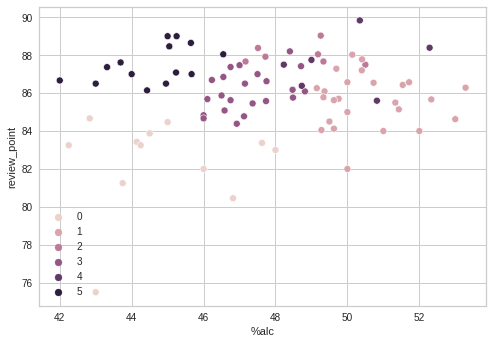

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data = whiskey, x = whiskey['%alc'], y =whiskey['review_point'], hue = kmeans2.labels_)
plt.show()

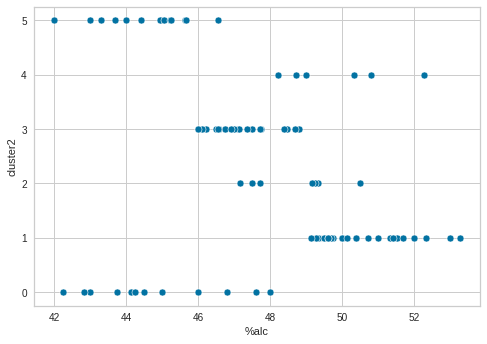

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data = whiskey, x = whiskey['%alc'], y =whiskey['cluster2'])
plt.show()

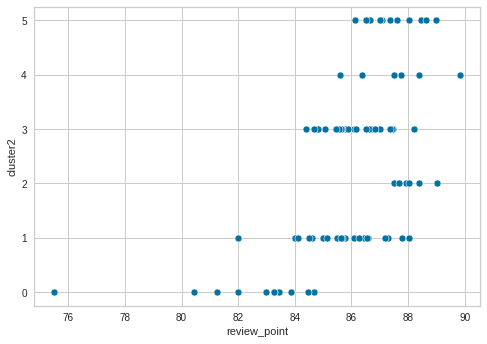

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data = whiskey, x = whiskey['review_point'], y =whiskey['cluster2'])
plt.show()

In [ ]:
KMeans for larger data set

In [ ]:
#reading in full dataset
whiskey_qual = pd.read_csv('https://raw.githubusercontent.com/schulzmf/IST718/main/projectwhisky_qual_clean.csv')

In [ ]:
#looking at the head of the data
whiskey_qual.head()

,Unnamed: 0,DistCode,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,%alc,category,review_point,price,description,name
0,0,0,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,58.0,Single Malt Scotch,94,181.0,Single cask Aberfeldy bottlings are very few a...,"Aberfeldy 14 year old Single Cask, 58.1%"
1,1,0,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,57.0,Single Malt Scotch,92,250.0,From a sherry cask. Bright and lively. Quite f...,Aberfeldy Single Cask (Cask No. 5) 16 year old...
2,2,0,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,40.0,Single Malt Scotch,88,170.0,Similar in flavor to the Aberfeldy 12 reviewed...,"Aberfeldy, 21 year old, 40%"
3,3,0,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,40.0,Single Malt Scotch,87,110.0,A prime component in Dewar’s blended scotch. T...,"Cask & Thistle (distilled at Aberfeldy), 29 ye..."
4,4,0,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,47.0,Single Malt Scotch,87,105.0,Independent releases of the Perthshire single ...,That Boutique-y Whisky Company (distilled at A...


In [ ]:
#making dataframe smaller to include only necessary data
whiskey2 = whiskey_qual[['Distillery','Body','Sweetness','Smoky','Medicinal','Tobacco','Honey','Spicy','Winey','Nutty','Malty','Fruity','Floral','%alc','review_point']]

In [ ]:
#setting index to distillery
whiskey2 = whiskey2.set_index('Distillery')

In [ ]:
whiskey2.head()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,%alc,review_point
Distillery,,,,,,,,,,,,,,
Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,58.0,94
Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,57.0,92
Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,40.0,88
Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,40.0,87
Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,47.0,87


In [ ]:
#dropping null values 
print(whiskey2.dropna())

              Body  Sweetness  Smoky  ...  Floral  %alc  review_point
Distillery                            ...                            
Aberfeldy        2          2      2  ...       2  58.0            94
Aberfeldy        2          2      2  ...       2  57.0            92
Aberfeldy        2          2      2  ...       2  40.0            88
Aberfeldy        2          2      2  ...       2  40.0            87
Aberfeldy        2          2      2  ...       2  47.0            87
...            ...        ...    ...  ...     ...   ...           ...
Tullibardine     2          3      0  ...       1  55.0            83
Tullibardine     2          3      0  ...       1  43.0            83
Tullibardine     2          3      0  ...       1  43.0            83
Tullibardine     2          3      0  ...       1  46.0            82
Tullibardine     2          3      0  ...       1  43.0            82

[1506 rows x 14 columns]


In [ ]:
#looking at amount of nulls in the data
whiskey2 = whiskey2.dropna()
whiskey2.isnull().sum()

Body            0
Sweetness       0
Smoky           0
Medicinal       0
Tobacco         0
Honey           0
Spicy           0
Winey           0
Nutty           0
Malty           0
Fruity          0
Floral          0
%alc            0
review_point    0
dtype: int64

In [ ]:
#creating kmeans model for second data set
model2 = KMeans()

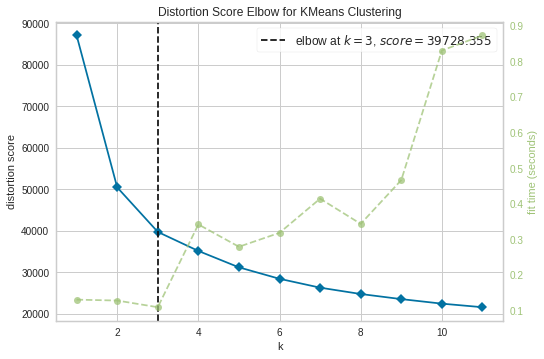

In [ ]:
#finding ideal number of clusters = 3
visualizer2 = KElbowVisualizer(model, k=(1,12)).fit(whiskey2)
visualizer2.show()

In [ ]:
kmeans2 = KMeans(n_clusters = 3,init = 'k-means++',random_state = 0).fit(whiskey2)

In [ ]:
y_predicted2 = kmeans.fit_predict(whiskey2)
y_predicted2

array([0, 0, 3, ..., 1, 1, 1], dtype=int32)

In [ ]:
whiskey2['cluster'] = y_predicted2
whiskey2.head()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,%alc,review_point,cluster
Distillery,,,,,,,,,,,,,,,
Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,58.0,94,0
Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,57.0,92,0
Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,40.0,88,3
Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,40.0,87,3
Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,47.0,87,3


In [ ]:
kmeans2.labels_

array([2, 2, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
kmeans2.inertia_

39728.35476092383

In [ ]:
kmeans2.n_iter_

25

In [ ]:
kmeans2.cluster_centers_

array([[ 2.30975143,  2.22179732,  1.74952199,  0.87380497,  0.10133843,
         1.36520076,  1.53728489,  1.24856597,  1.38814532,  1.79923518,
         1.81070746,  1.51051625, 45.58508604, 90.02676864],
       [ 2.03100775,  2.24224806,  1.50775194,  0.6375969 ,  0.13565891,
         1.25968992,  1.42248062,  1.01550388,  1.4496124 ,  1.84496124,
         1.85077519,  1.64534884, 44.04651163, 83.55426357],
       [ 2.28051392,  2.07494647,  1.95503212,  1.03426124,  0.16059957,
         1.31905782,  1.45824411,  1.16702355,  1.43683084,  1.70235546,
         1.64453961,  1.52034261, 55.33618844, 86.44325482]])

In [ ]:
from collections import Counter
Counter(kmeans2.labels_)

Counter({0: 523, 1: 516, 2: 467})

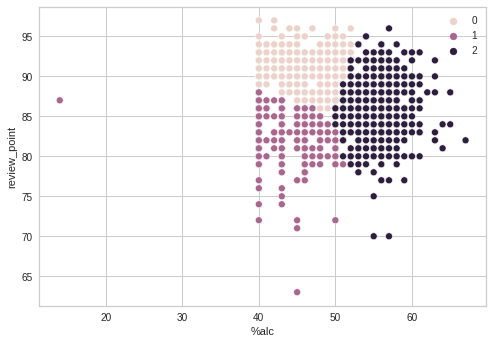

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data = whiskey2, x = whiskey2['%alc'], y =whiskey2['review_point'], hue = kmeans2.labels_)
plt.show()

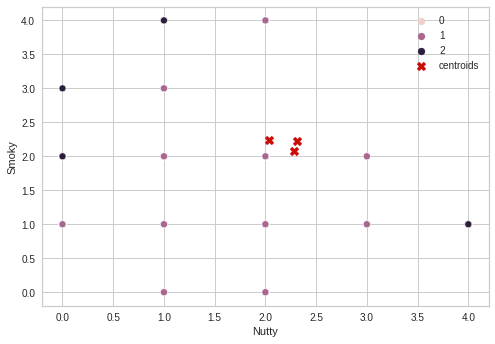

In [ ]:
sns.scatterplot(data = whiskey2, x = whiskey2['Nutty'], y =whiskey2['Smoky'], hue = kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()